In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


#Как будем сравнивать различные методы?

In [72]:
import pandas as pd
import numpy as np
import random
import collections
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
def insert_NA(df, per):
  replaced = collections.defaultdict(set)
  ix = [(row, col) for row in range(df.shape[0]) for col in range(df.shape[1])]
  random.shuffle(ix)
  to_replace = int(round(per*len(ix)))
  for row, col in ix:
    if len(replaced[row]) < df.shape[1] - 1:
      df.iloc[row, col] = np.nan
      to_replace -= 1
      replaced[row].add(col)
      if to_replace == 0:
        break
  
  return(df)

In [74]:
def MAE(actual, missing, imputation):
  mask = missing.isna()
  return(abs(actual[mask] - imputation[mask]).sum().sum() / mask.sum().sum())

In [75]:
dataset = pd.read_csv("/content/gdrive/MyDrive/ML/Datasets/Breast Cancer Wisconsin (Diagnostic).csv")

In [76]:
dataset.shape

(569, 31)

In [77]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [78]:
dataset = dataset.drop(["diagnosis"], axis = 1)

In [79]:
dataset.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [80]:
data_NA = insert_NA(dataset.copy(), 0.05)
data_NA.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,NaN,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,NaN,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,NaN,NaN,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,NaN,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,NaN,0.4000,0.1625,NaN,0.07678


In [81]:
data_NA.shape

(569, 30)

In [82]:
data_NA.isna().sum()

radius_mean                32
texture_mean               19
perimeter_mean             27
area_mean                  30
smoothness_mean            19
compactness_mean           29
concavity_mean             19
concave points_mean        37
symmetry_mean              33
fractal_dimension_mean     32
radius_se                  24
texture_se                 34
perimeter_se               29
area_se                    27
smoothness_se              28
compactness_se             28
concavity_se               34
concave points_se          29
symmetry_se                27
fractal_dimension_se       22
radius_worst               26
texture_worst              34
perimeter_worst            32
area_worst                 22
smoothness_worst           21
compactness_worst          33
concavity_worst            36
concave points_worst       23
symmetry_worst             29
fractal_dimension_worst    39
dtype: int64

In [83]:
data_NA.isnull().mean().sort_values(ascending = False)

fractal_dimension_worst    0.068541
concave points_mean        0.065026
concavity_worst            0.063269
concavity_se               0.059754
texture_se                 0.059754
texture_worst              0.059754
compactness_worst          0.057996
symmetry_mean              0.057996
fractal_dimension_mean     0.056239
radius_mean                0.056239
perimeter_worst            0.056239
area_mean                  0.052724
compactness_mean           0.050967
concave points_se          0.050967
symmetry_worst             0.050967
perimeter_se               0.050967
smoothness_se              0.049209
compactness_se             0.049209
area_se                    0.047452
symmetry_se                0.047452
perimeter_mean             0.047452
radius_worst               0.045694
radius_se                  0.042179
concave points_worst       0.040422
fractal_dimension_se       0.038664
area_worst                 0.038664
smoothness_worst           0.036907
smoothness_mean            0

In [84]:
from sklearn.impute import SimpleImputer

In [85]:
sumple_imp = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0)

In [86]:
data_NA_zero = sumple_imp.fit_transform(data_NA)
data_NA_zero = pd.DataFrame(data_NA_zero, columns = data_NA.columns)

In [87]:
data_NA_zero.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.00000,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.0000,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,0.0,0.00000,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.0000,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.0000,0.4000,0.1625,0.0000,0.07678


In [88]:
data_NA_zero.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [89]:
zero_mae = MAE(dataset, data_NA, data_NA_zero)
zero_mae

53.51103463934426

#Удаление неполных векторов

In [24]:
data_NA.isna().sum()

radius_mean                170
texture_mean               172
perimeter_mean             172
area_mean                  176
smoothness_mean            188
compactness_mean           165
concavity_mean             168
concave points_mean        160
symmetry_mean              177
fractal_dimension_mean     187
radius_se                  167
texture_se                 167
perimeter_se               155
area_se                    172
smoothness_se              169
compactness_se             185
concavity_se               173
concave points_se          168
symmetry_se                167
fractal_dimension_se       148
radius_worst               167
texture_worst              182
perimeter_worst            178
area_worst                 169
smoothness_worst           177
compactness_worst          171
concavity_worst            178
concave points_worst       163
symmetry_worst             181
fractal_dimension_worst    149
dtype: int64

In [25]:
data_NA.shape

(569, 30)

In [28]:
data_NA.dropna(axis = 0).shape

(0, 30)

In [31]:
data_NA.dropna(axis = 1).shape

(569, 0)

In [33]:
# отбросить строки, только если все столбцы содержат NaN
data_NA.dropna(how = 'all', axis = 0).shape

(569, 30)

In [ ]:
# отбросить строки, если в них менее 4 значений не NaN
data_NA.dropna(thresh = 4).shape

(569, 30)

In [ ]:
# отбросить столбцы, если в них менее 10 значений не NaN
data_NA.dropna(thresh = 10, axis = 1).shape

(569, 30)

#SimpleImputer:

In [90]:
from sklearn.impute import SimpleImputer

##Среднее арифметическое

In [91]:
data_NA.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,NaN,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,NaN,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,NaN,NaN,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,NaN,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,NaN,0.4000,0.1625,NaN,0.07678


In [92]:
sumple_imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [93]:
data_NA_mean = sumple_imp.fit_transform(data_NA)

In [94]:
data_NA_mean = pd.DataFrame(data_NA_mean, columns = data_NA.columns)

In [95]:
data_NA_mean.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.000000,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.905300,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.665600,0.711900,0.2654,0.460100,0.11890
1,20.57,17.77,132.90,1326.000000,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.733900,3.398,74.08,0.005225,0.01308,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.186600,0.241600,0.1860,0.275000,0.08902
2,19.69,21.25,130.00,1203.000000,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.786900,4.585,94.03,0.006150,0.04006,0.03832,0.011753,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.424500,0.269345,0.2430,0.361300,0.08758
3,11.42,20.38,77.58,386.100000,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.156000,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.866300,0.686900,0.2575,0.663800,0.17300
4,20.29,14.34,135.10,655.015584,0.09642,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,1.210253,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.253217,0.400000,0.1625,0.290816,0.07678


In [96]:
data_NA_mean.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [97]:
mean_mae = MAE(dataset, data_NA, data_NA_mean)
mean_mae

21.106004334254283

##Медиана

In [98]:
%%time
sumple_imp = SimpleImputer(missing_values = np.nan, strategy = 'median')

data_NA_median = sumple_imp.fit_transform(data_NA)
data_NA_median = pd.DataFrame(data_NA_median, columns = data_NA.columns)

CPU times: user 5.62 ms, sys: 0 ns, total: 5.62 ms
Wall time: 6.47 ms


In [99]:
data_NA_median.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [100]:
data_NA_mean.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.000000,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.905300,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.665600,0.711900,0.2654,0.460100,0.11890
1,20.57,17.77,132.90,1326.000000,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.733900,3.398,74.08,0.005225,0.01308,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.186600,0.241600,0.1860,0.275000,0.08902
2,19.69,21.25,130.00,1203.000000,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.786900,4.585,94.03,0.006150,0.04006,0.03832,0.011753,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.424500,0.269345,0.2430,0.361300,0.08758
3,11.42,20.38,77.58,386.100000,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.156000,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.866300,0.686900,0.2575,0.663800,0.17300
4,20.29,14.34,135.10,655.015584,0.09642,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,1.210253,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.253217,0.400000,0.1625,0.290816,0.07678


In [101]:
median_mae = MAE(dataset, data_NA, data_NA_median)
median_mae

18.980742973067912

##Мода

In [102]:
sumple_imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

data_NA_moda = sumple_imp.fit_transform(data_NA)
data_NA_moda = pd.DataFrame(data_NA_moda, columns = data_NA.columns)

In [103]:
moda_mae = MAE(dataset, data_NA, data_NA_moda)
moda_mae

24.073390887587816

#Multivariate feature imputation

In [104]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Iterative Imputer (RandomForestRegressor)

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
imp_iter = IterativeImputer(missing_values = np.nan, estimator = RandomForestRegressor())

In [107]:
%%time
data_NA_rf = imp_iter.fit_transform(data_NA)
data_NA_rf = pd.DataFrame(data_NA_rf, columns = data_NA.columns)

CPU times: user 2min 22s, sys: 481 ms, total: 2min 22s
Wall time: 2min 22s


In [108]:
data_NA_rf.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [109]:
data_NA_rf.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.00,0.118400,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.905300,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.665600,0.711900,0.2654,0.460100,0.11890
1,20.57,17.77,132.90,1326.00,0.084740,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.733900,3.398,74.08,0.005225,0.01308,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.186600,0.241600,0.1860,0.275000,0.08902
2,19.69,21.25,130.00,1203.00,0.109600,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.786900,4.585,94.03,0.006150,0.04006,0.03832,0.016182,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.424500,0.531745,0.2430,0.361300,0.08758
3,11.42,20.38,77.58,386.10,0.142500,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.156000,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.866300,0.686900,0.2575,0.663800,0.17300
4,20.29,14.34,135.10,1278.94,0.107039,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,1.306161,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.281287,0.400000,0.1625,0.252328,0.07678


In [110]:
rf_mae = MAE(dataset, data_NA, data_NA_rf)
rf_mae

1.2253043761285813

##MissForest

In [111]:
!pip install missingpy
from missingpy import MissForest

In [112]:
imputer = MissForest()

In [113]:
%%time
data_NA_miss_forest = imputer.fit_transform(data_NA)
data_NA_miss_forest = pd.DataFrame(data_NA_miss_forest, columns = data_NA.columns)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
CPU times: user 3min 32s, sys: 3.68 s, total: 3min 36s
Wall time: 2min 20s


In [114]:
miss_forest_mae = MAE(dataset, data_NA, data_NA_miss_forest)
miss_forest_mae

1.2357143343570263

##KNNImputer

In [115]:
from sklearn.impute import KNNImputer

In [116]:
imputer = KNNImputer(n_neighbors = 5, weights = "uniform")

In [117]:
data_NA_KNNImputer = imputer.fit_transform(data_NA)
data_NA_KNNImputer = pd.DataFrame(data_NA_KNNImputer, columns = data_NA.columns)

In [118]:
knn_mae = MAE(dataset, data_NA, data_NA_KNNImputer)
knn_mae

4.807099087447306

#Сравниваем методы

In [120]:
list_mae = [zero_mae, mean_mae, median_mae, moda_mae, rf_mae, miss_forest_mae, knn_mae]
methods = ['Zero', 'Mean', 'Median', 'Moda', 'Random Forest', 'Miss Forest', 'KNN']

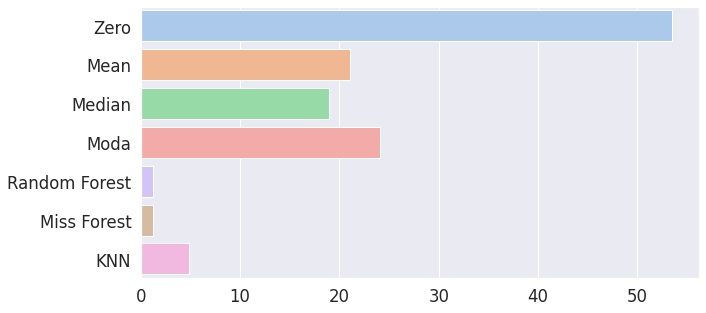

In [121]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(y = methods, x = list_mae, palette = 'pastel', orient = 'h');

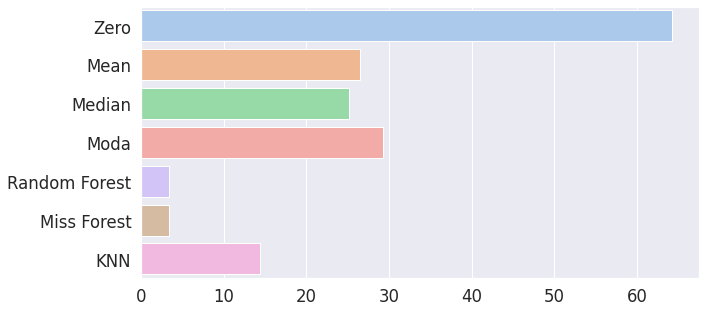

In [71]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(y = methods, x = list_mae, palette = 'pastel', orient = 'h');

#Восстановление пропущенных значений в данных смешанного типа

In [128]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split

In [129]:
!pip install missingpy
from missingpy import MissForest
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

class Catman:
  method_imputation_missing_value = MissForest()
  categorical_feature_list = None
  encoding_dict = None

  def __init__(self):
    pass

  def fit(self, data):
    self.categorical_feature_list = list(data.select_dtypes(include = 'object').columns)
    self.encoding_dict = defaultdict(LabelEncoder)
    
    cat_vars = [data.columns.get_loc(c) for c in self.categorical_feature_list if c in data]
    original = data.copy()
    mask = original.isnull()

    for col in self.categorical_feature_list:
      data[col][pd.isnull(data[col])] = 'XXX'
      self.encoding_dict[col] = LabelEncoder().fit(list(data[col]))
      data[col] = self.encoding_dict[col].transform(data[col])

    data = data.where(~mask, original)
    self.method_imputation_missing_value.fit(data, cat_vars)


  def transform(self, data):
    int_label = list(data.select_dtypes(include = 'object').columns) + list(data.select_dtypes(include = 'int64').columns)
    original = data.copy()
    mask = original.isnull()

    for col in self.categorical_feature_list:
      data[col][pd.isnull(data[col])] = 'XXX'
      self.encoding_dict[col] = LabelEncoder().fit(list(data[col]))
      data[col] = self.encoding_dict[col].transform(data[col])

    data = data.where(~mask, original)
    data = pd.DataFrame(self.method_imputation_missing_value.transform(data), columns = data.columns)

    for i in int_label:
      data[i] = data[i].astype(int)

    for col in self.categorical_feature_list:
      data[col] = self.encoding_dict[col].inverse_transform(data[col])

    return(data)
      
  def fit_transform(self, data):
    self.categorical_feature_list = list(data.select_dtypes(include = 'object').columns)
    self.encoding_dict = defaultdict(LabelEncoder)
    
    int_label = list(data.select_dtypes(include = 'object').columns) + list(data.select_dtypes(include = 'int64').columns)
    cat_vars = [data.columns.get_loc(c) for c in self.categorical_feature_list if c in data]
    original = data.copy()
    mask = original.isnull()

    for col in self.categorical_feature_list:
      data[col][pd.isnull(data[col])] = 'XXX'
      self.encoding_dict[col] = LabelEncoder().fit(list(data[col]))
      data[col] = self.encoding_dict[col].transform(data[col])

    data = data.where(~mask, original)
    data = pd.DataFrame(self.method_imputation_missing_value.fit_transform(data, cat_vars), columns = data.columns)

    for i in int_label:
      data[i] = data[i].astype(int)

    for col in self.categorical_feature_list:
      data[col] = self.encoding_dict[col].inverse_transform(data[col])

    return(data)

In [122]:
path = "/content/gdrive/MyDrive/ML/Datasets/adult.csv"
data = pd.read_csv(path, sep = ",")

In [123]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Never-worked,77053,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Never-worked,186061,Some-college,10,Widowed,Handlers-cleaners,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [124]:
X = data.drop(["income"], axis = 1)

In [125]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Never-worked,77053,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Never-worked,186061,Some-college,10,Widowed,Handlers-cleaners,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [126]:
X.shape

(32561, 14)

In [ ]:
X.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [130]:
X_NA_train, X_NA_val = train_test_split(X, test_size = 0.90)

In [131]:
X_NA_train, X_NA_val = train_test_split(X_NA_train, test_size = 0.5)

In [132]:
X_NA_train = X_NA_train.reset_index(drop = True)

In [133]:
X_NA_train = insert_NA(X_NA_train.copy(), 0.3)
X_NA_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,NaN,Private,NaN,HS-grad,9.0,Never-married,Machine-op-inspct,NaN,White,NaN,0.0,0.0,40.0,NaN
1,34.0,Private,318886.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,Black,Male,NaN,0.0,NaN,United-States
2,NaN,Private,NaN,Some-college,10.0,Never-married,Sales,Own-child,White,Female,NaN,0.0,20.0,United-States
3,22.0,Private,212114.0,Bachelors,13.0,Never-married,Handlers-cleaners,NaN,NaN,Female,0.0,NaN,15.0,United-States
4,37.0,NaN,NaN,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,NaN,0.0,0.0,45.0,NaN


In [134]:
X_NA_train.shape

(1628, 14)

In [135]:
X_NA_train.isna().sum()

age               479
workclass         500
fnlwgt            494
education         483
education.num     462
marital.status    524
occupation        493
relationship      473
race              505
sex               518
capital.gain      465
capital.loss      487
hours.per.week    476
native.country    479
dtype: int64

In [ ]:
imputer = MissForest()
data_NA_miss_forest = imputer.fit_transform(X_NA_train)

In [137]:
a = Catman()

In [ ]:
%%time
a.fit(X_NA_train.copy())

In [139]:
%%time
res = a.transform(X_NA_train.copy())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [140]:
X_NA_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,NaN,Private,NaN,HS-grad,9.0,Never-married,Machine-op-inspct,NaN,White,NaN,0.0,0.0,40.0,NaN
1,34.0,Private,318886.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,Black,Male,NaN,0.0,NaN,United-States
2,NaN,Private,NaN,Some-college,10.0,Never-married,Sales,Own-child,White,Female,NaN,0.0,20.0,United-States
3,22.0,Private,212114.0,Bachelors,13.0,Never-married,Handlers-cleaners,NaN,NaN,Female,0.0,NaN,15.0,United-States
4,37.0,NaN,NaN,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,NaN,0.0,0.0,45.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,19.0,NaN,NaN,Some-college,10.0,Never-married,Other-service,Own-child,NaN,NaN,NaN,0.0,23.0,United-States
1624,52.0,Self-emp-not-inc,NaN,HS-grad,9.0,NaN,Farming-fishing,Husband,White,Male,0.0,1887.0,60.0,United-States
1625,34.0,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,NaN,White,Male,0.0,0.0,40.0,United-States
1626,52.0,Private,NaN,Assoc-voc,NaN,NaN,NaN,Wife,NaN,Female,0.0,NaN,20.0,United-States


In [141]:
res

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,23.27,Private,203167.35,HS-grad,9.0,Never-married,Machine-op-inspct,Other-relative,White,Female,0.0,0.00,40.00,United-States
1,34.00,Private,318886.00,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,Black,Male,2118.8,0.00,51.95,United-States
2,20.87,Private,221336.74,Some-college,10.0,Never-married,Sales,Own-child,White,Female,0.0,0.00,20.00,United-States
3,22.00,Private,212114.00,Bachelors,13.0,Never-married,Handlers-cleaners,Other-relative,Other,Female,0.0,16.02,15.00,United-States
4,37.00,Private,216653.73,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.00,45.00,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,19.00,Private,187354.84,Some-college,10.0,Never-married,Other-service,Own-child,Other,Female,0.0,0.00,23.00,United-States
1624,52.00,Self-emp-not-inc,133983.44,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,1887.00,60.00,United-States
1625,34.00,Private,218914.92,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.00,40.00,United-States
1626,52.00,Private,158075.42,Assoc-voc,11.0,Married-spouse-absent,Handlers-cleaners,Wife,Other,Female,0.0,52.89,20.00,United-States


In [142]:
res.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

In [143]:
!git clone https://github.com/MazalTovGeksli/Imputation_missing_values.git
!pip install missingpy

import Imputation_missing_values.Imputation_missing_values.Imputation_missing_values as imv

Cloning into 'Imputation_missing_values'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 0), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [144]:
X_NA_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,NaN,Private,NaN,HS-grad,9.0,Never-married,Machine-op-inspct,NaN,White,NaN,0.0,0.0,40.0,NaN
1,34.0,Private,318886.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,Black,Male,NaN,0.0,NaN,United-States
2,NaN,Private,NaN,Some-college,10.0,Never-married,Sales,Own-child,White,Female,NaN,0.0,20.0,United-States
3,22.0,Private,212114.0,Bachelors,13.0,Never-married,Handlers-cleaners,NaN,NaN,Female,0.0,NaN,15.0,United-States
4,37.0,NaN,NaN,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,NaN,0.0,0.0,45.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,19.0,NaN,NaN,Some-college,10.0,Never-married,Other-service,Own-child,NaN,NaN,NaN,0.0,23.0,United-States
1624,52.0,Self-emp-not-inc,NaN,HS-grad,9.0,NaN,Farming-fishing,Husband,White,Male,0.0,1887.0,60.0,United-States
1625,34.0,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,NaN,White,Male,0.0,0.0,40.0,United-States
1626,52.0,Private,NaN,Assoc-voc,NaN,NaN,NaN,Wife,NaN,Female,0.0,NaN,20.0,United-States


In [ ]:
a = Catman()

In [ ]:
%%time
a.fit(X_NA_train.copy())
res = a.transform(X_NA_train.copy())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
CPU times: user 1min 6s, sys: 2.32 s, total: 1min 8s
Wall time: 51.7 s


In [ ]:
res

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,48.00,Private,174533.00,HS-grad,9.0,Married-civ-spouse,Handlers-cleaners,Other-relative,White,Female,592.40,35.59,40.00,United-States
1,21.00,Never-worked,174907.00,Assoc-acdm,12.0,Never-married,Sales,Other-relative,Other,Female,0.00,0.00,32.00,United-States
2,34.00,Private,85374.00,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.00,0.00,50.65,United-States
3,25.00,Private,283515.00,Some-college,10.0,Never-married,Protective-serv,Not-in-family,White,Female,0.00,0.00,60.00,United-States
4,55.00,Private,67450.00,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Not-in-family,White,Male,13321.10,631.07,40.00,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,51.20,Local-gov,342175.00,Masters,14.0,Divorced,Adm-clerical,Not-in-family,White,Female,2009.00,129.01,40.00,United-States
1624,32.90,Private,152046.00,11th,7.0,Never-married,Machine-op-inspct,Not-in-family,Black,Female,0.00,0.00,35.00,Germany
1625,39.64,Private,308550.00,HS-grad,9.0,Married-AF-spouse,Craft-repair,Not-in-family,White,Female,0.00,0.00,60.00,United-States
1626,57.88,Private,260541.89,7th-8th,4.0,Married-AF-spouse,Machine-op-inspct,Not-in-family,Other,Female,7688.00,0.00,40.00,Poland
